In [1]:
%load_ext autoreload
%autoreload 2

In [94]:
import gin
import numpy as np
import torch
import pytorch_lightning
from deepgen.models import GruLabeler
from deepgen.data import DatasetXY
from deepgen.utils import train_model, test_model
from tqdm import tqdm
import scipy 
import seaborn as sns

from matplotlib import pyplot as plt

sns.set() # Setting seaborn as default style even if use only matplotlib
sns.set_context("paper")


gin.parse_config_file('configs/gru.gin')
gru_model = GruLabeler.load_from_checkpoint(checkpoint_path="../Output/output_const/GRU.ckpt").eval()
dataset = DatasetXY()

<BarContainer object of 16 artists>

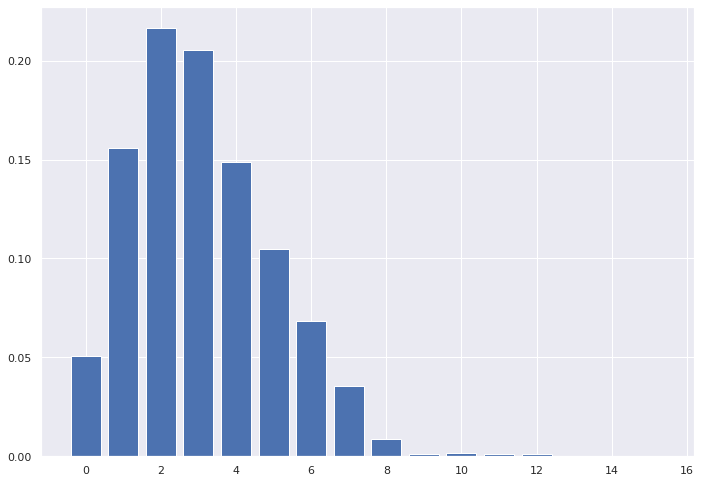

In [27]:
plt.bar(np.arange(16), torch.bincount(Y.squeeze(0).long(), minlength=16) / sum(torch.bincount(Y.squeeze(0).long(), minlength=16)))

<BarContainer object of 32 artists>

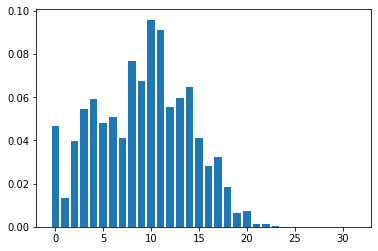

In [30]:
plt.bar(np.arange(32), torch.bincount(Y.squeeze(0).long(), minlength=32) / sum(torch.bincount(Y.squeeze(0).long(), minlength=32)))

In [50]:
def myexp(data):
    #return scipy.special.softmax(data, axis=-1)
    return scipy.special.softmax(data, axis=-1)

In [70]:
xx = torch.load("output_const_big_test/x_1.pt")
y_pred = myexp(torch.load("output_const_big_test/y_pred_1.pt"))
y_true = torch.load("output_const_big_test/y_true_1.pt")

In [84]:
def plot_heatmap(y_pred, y_true, length):
    sns.set(rc={'figure.figsize' : (11.7, 8.27),
           'axes.labelsize': 20,
           'axes.titlesize': 20, 
            'figure.dpi':100
           }
       )
    ax = sns.heatmap(y_pred.squeeze(0)[:length].T, cmap="viridis", yticklabels=5, xticklabels=1000)
    ax.plot(y_true[0][:length], c='red')
    _ = ax.set(xlabel='Genome wide', ylabel='Coalescent time', title="Coalescent time distribution")
    #ax.set_ylim([23, 0])
    plt.show()

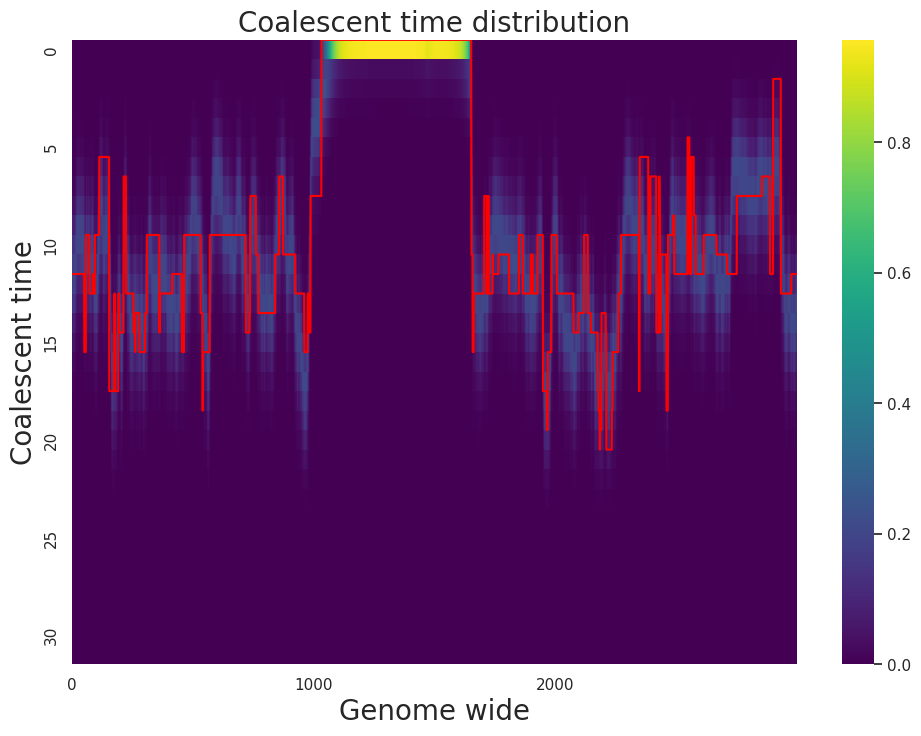

In [85]:
plot_heatmap(y_pred, y_true, 3000)

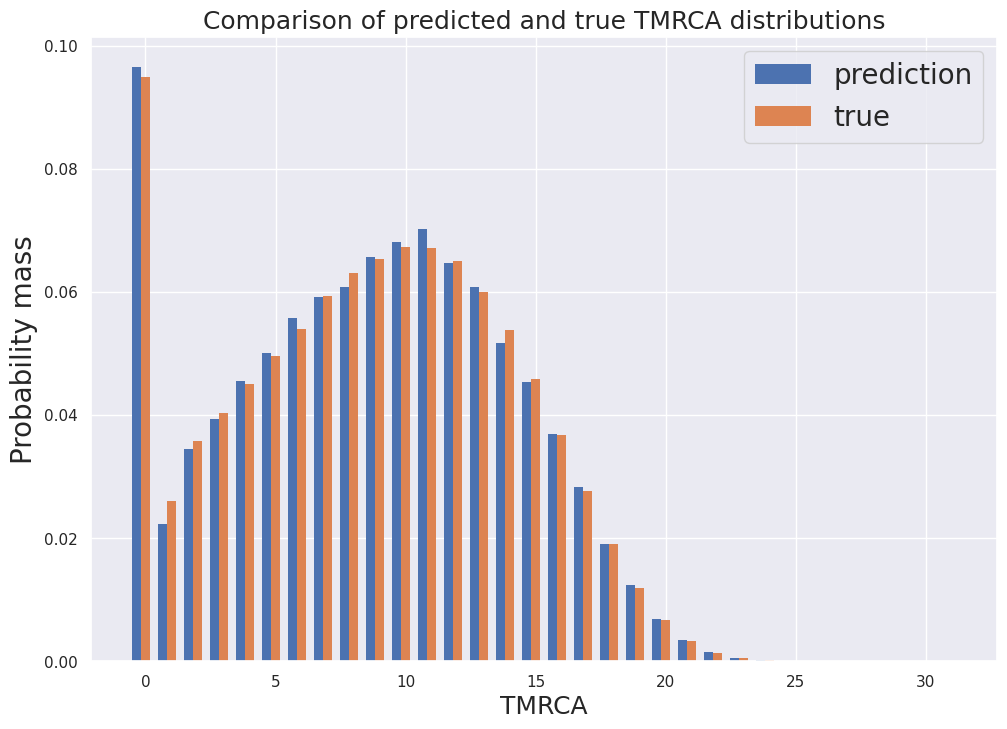

In [138]:

y_pred_const = [0.0] * 32

for i in range(99):
    data = myexp(torch.load(f"output_const_big_test/y_pred_{i}.pt"))
    y_pred_const += data.sum(dim=[0, 1]).detach().numpy()

y_pred_const = y_pred_const / sum(y_pred_const)

y_true_const = [0.0] * 32


for i in range(99):
    Y = torch.load(f"output_const_big_test/y_true_{i}.pt")
    y_true_const += torch.bincount(Y.squeeze(0).long(), minlength=32).numpy()
    
y_true_const = y_true_const / sum(y_true_const)

w = 0.35
plt.bar(np.arange(32)-w, y_pred_const, width=w, label='prediction',  align='center', edgecolor='none')
plt.bar(np.arange(32), y_true_const, width=w, label='true',  align='center', edgecolor='none')

plt.ylabel("Probability mass", fontsize=20)
plt.xlabel("TMRCA", fontsize=18)
plt.title("Comparison of predicted and true TMRCA distributions", fontsize=18)
plt.legend(fontsize=20)

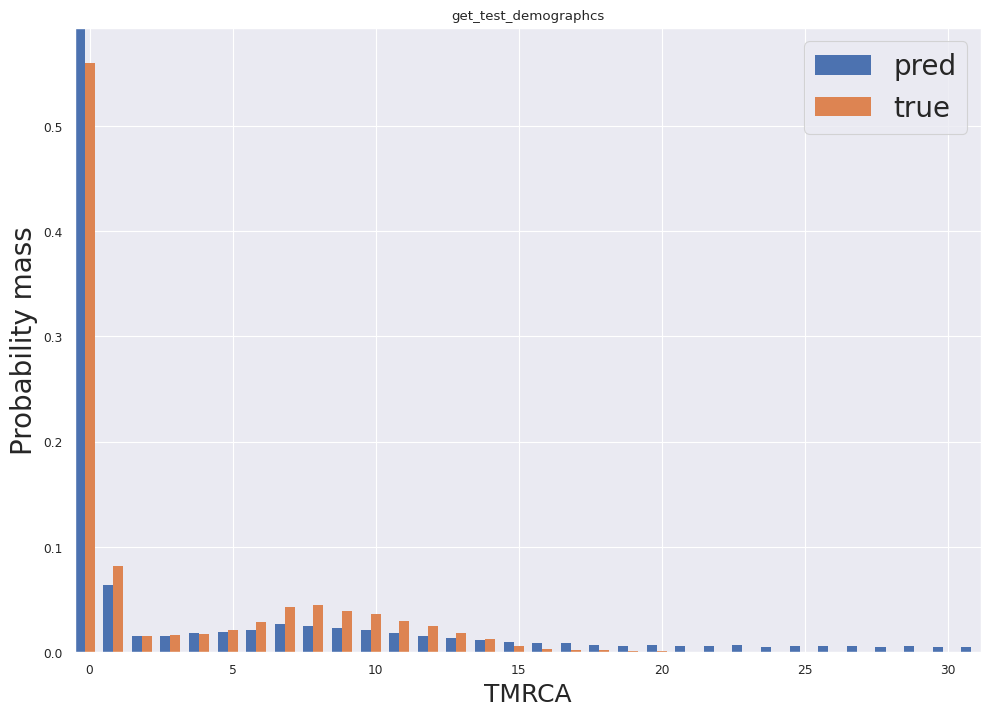

In [121]:
x = np.arange(32)

y_pred_const = [0.0] * 32

for i in range(99):
    data = myexp(torch.load(f"output_test_big_test/y_pred_{i}.pt"))
    y_pred_const += data.sum(dim=[0, 1]).detach().numpy()

y_pred_const = y_pred_const / sum(y_pred_const)



y_true_const = [0.0] * 32


for i in range(99):
    Y = torch.load(f"output_test_big_test/y_true_{i}.pt")
    y_true_const += torch.bincount(Y.squeeze(0).long(), minlength=32).numpy()
    
y_true_const = y_true_const / sum(y_true_const)


w = 0.35
plt.bar(np.arange(32)-w, y_pred_const, width=w, label='pred',  align='center', edgecolor='none')
plt.bar(np.arange(32), y_true_const, width=w, label='true',  align='center', edgecolor='none')

plt.ylabel("Probability mass", fontsize=20)
plt.xlabel("TMRCA", fontsize=18)
plt.title("get_test_demographcs")
plt.legend(fontsize=20)

plt.autoscale(tight=True)

In [139]:
x = np.arange(32)

y_pred_const = [0.0] * 32

for i in range(99):
    data = myexp(torch.load(f"output_test_big_test2/y_pred_{i}.pt"))
    y_pred_const += data.sum(dim=[0, 1]).detach().numpy()

y_pred_const = y_pred_const / sum(y_pred_const)



y_true_const = [0.0] * 32


for i in range(99):
    Y = torch.load(f"output_test_big_test2/y_true_{i}.pt")
    y_true_const += torch.bincount(Y.squeeze(0).long(), minlength=32).numpy()
    
y_true_const = y_true_const / sum(y_true_const)

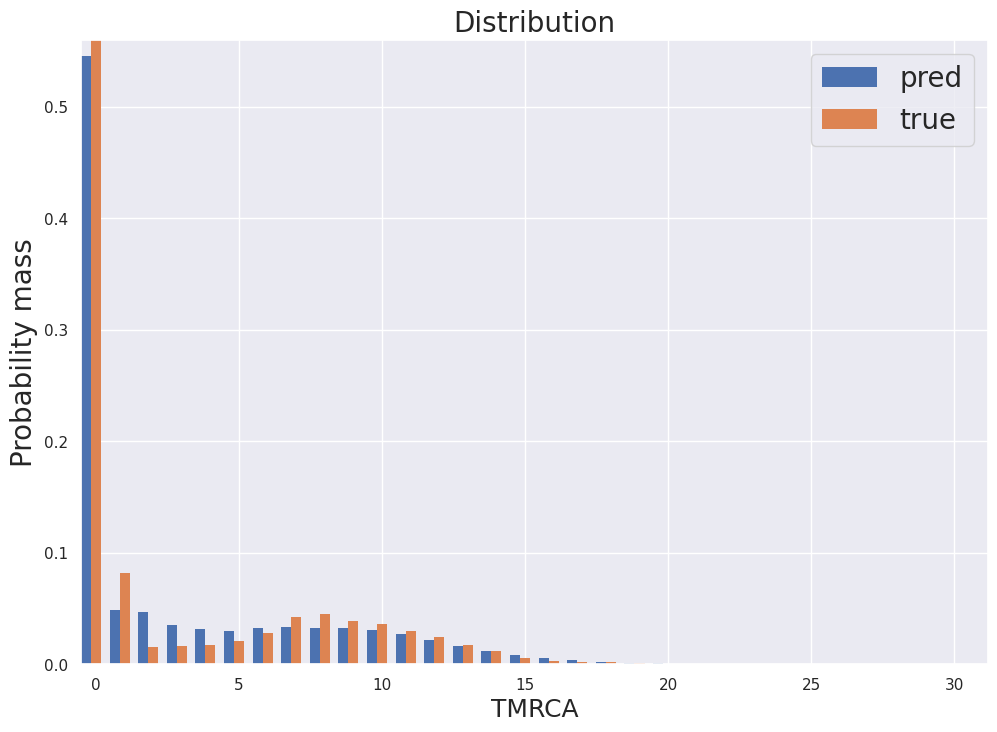

In [166]:
w = 0.35
plt.bar(np.arange(32)-w, y_pred_const, width=w, label='pred',  align='center', edgecolor='none')
plt.bar(np.arange(32), y_true_const, width=w, label='true',  align='center', edgecolor='none')

plt.ylabel("Probability mass", fontsize=20)
plt.xlabel("TMRCA", fontsize=18)
plt.title("Distribution")
plt.legend(fontsize=20)

plt.autoscale(tight=True)

In [129]:
xx = torch.load("output_test_big_test/x_1.pt")
y_pred = myexp(torch.load("output_test_big_test/y_pred_1.pt"))
y_true = torch.load("output_test_big_test/y_true_1.pt")

gru_model_const = GruLabeler.load_from_checkpoint(checkpoint_path="../Output/output_const/GRU.ckpt").eval()

with torch.no_grad():
    y_pred_m = myexp(gru_model_const(xx))

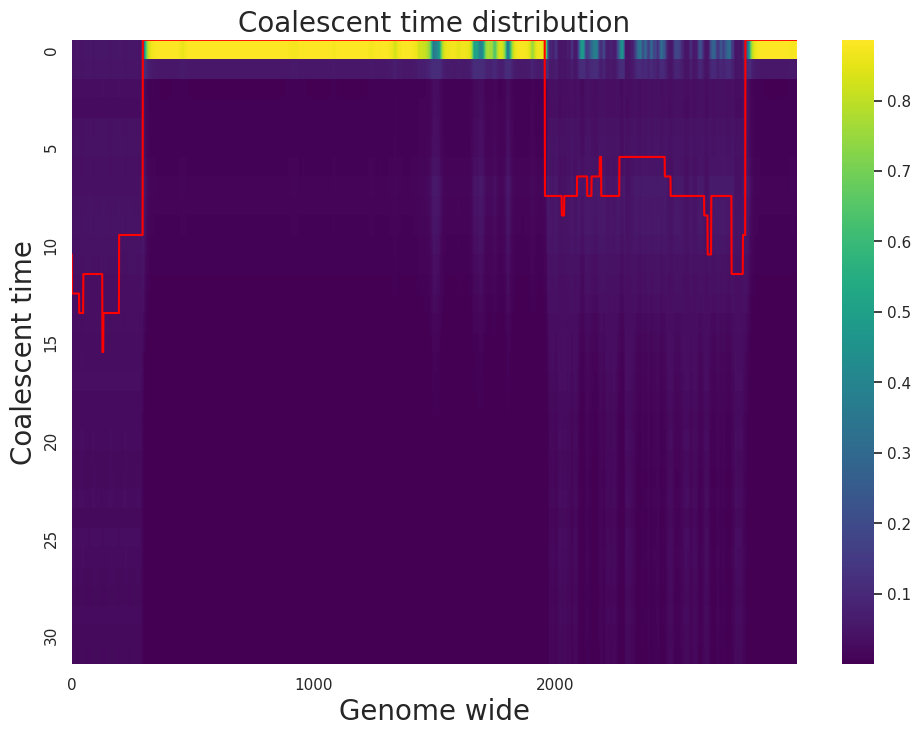

In [130]:
plot_heatmap(y_pred, y_true, 3000)

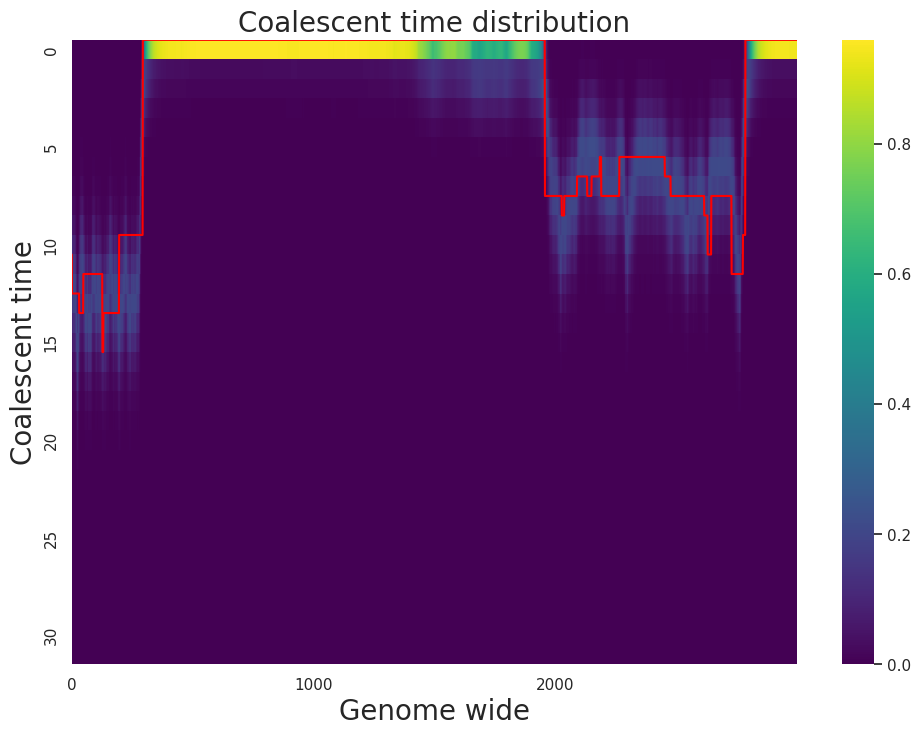

In [131]:
plot_heatmap(y_pred_m, y_true, 3000)

In [ ]:
torch.bincount(y_true.squeeze(0).long(), minlength=16)

In [134]:
y_true.shape

torch.Size([1, 30000])

<BarContainer object of 32 artists>

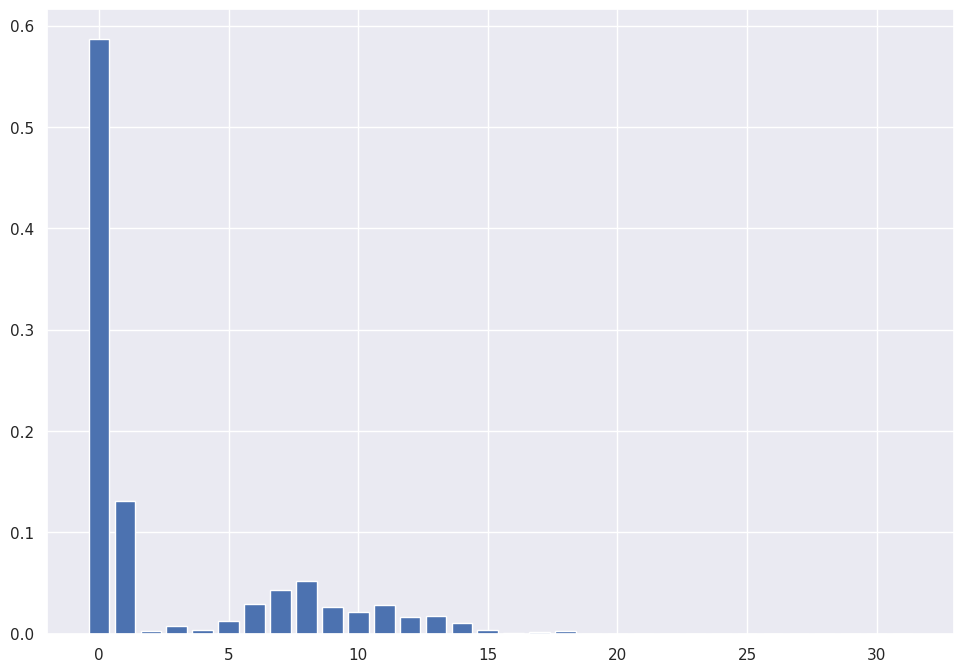

In [135]:
plt.bar(np.arange(32), torch.bincount(y_true.squeeze(0).long(), minlength=32) / sum(torch.bincount(y_true.squeeze(0).long(), minlength=32)))

# MS

In [136]:
gin.parse_config_file('configs/gru.gin')
gru_model_ms = GruLabeler.load_from_checkpoint(checkpoint_path="../Output/output_ms/GRU.ckpt").eval()
dataset = DatasetXY()

In [162]:
y_true_ms = torch.load("../Output/output_ms/0_y_true.pt")
y_pred_ms = scipy.special.softmax(torch.load("../Output/output_ms/0_y_pred.pt"), axis=-1)
y_pred_ms_exp = scipy.special.softmax(torch.exp(torch.load("../Output/output_ms/0_y_pred.pt")), axis=-1)

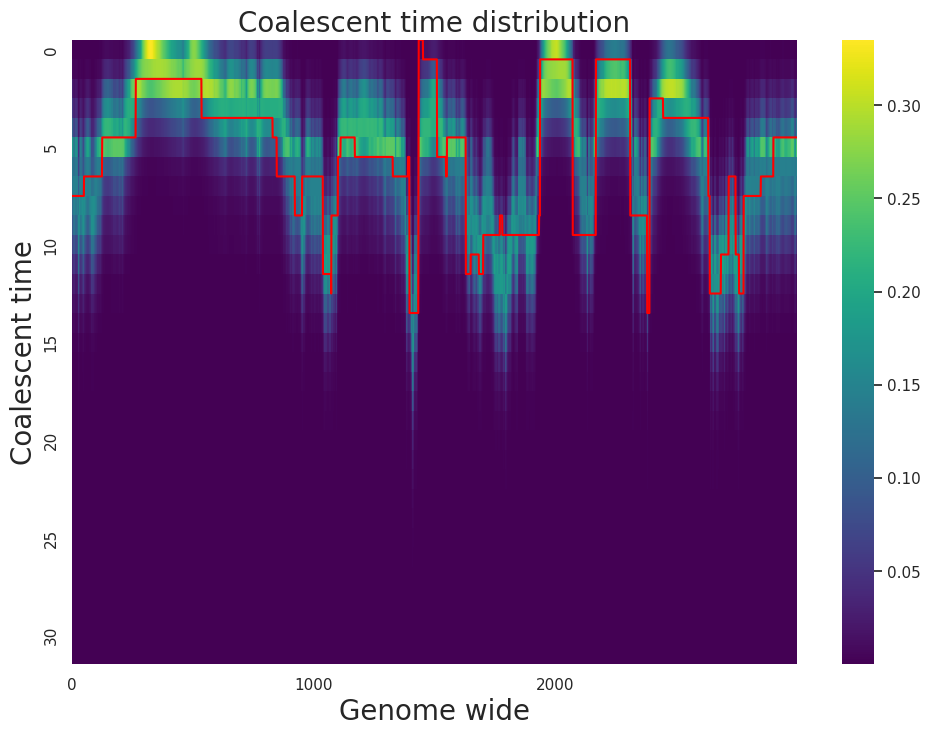

In [165]:
plot_heatmap(y_pred_ms, y_true_ms, 3000)

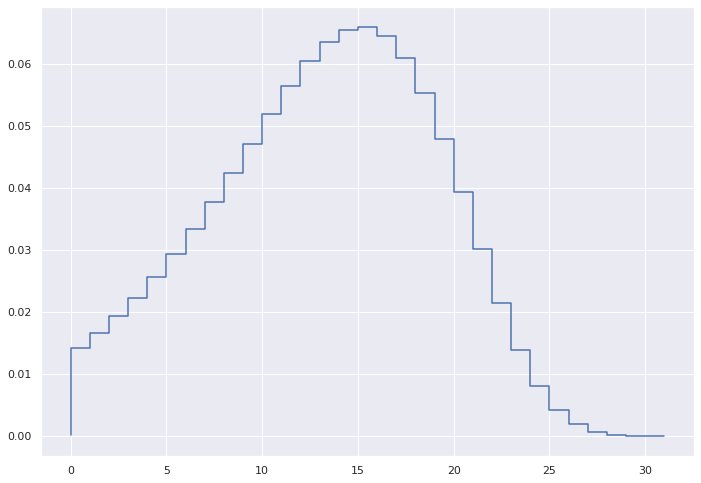

In [37]:
tau = [1.0,
 143.20188644983315,
 170.19461651944638,
 200.8725974765842,
 237.08035684183574,
 279.8146502128262,
 330.2519007340634,
 389.7805845959324,
 460.0394540962477,
 542.962650498785,
 640.8329485909435,
 756.3445986984725,
 892.6774961215488,
 1053.5847197866005,
 1243.4958499465338,
 1467.6389091400697,
 1732.1842832965376,
 2044.4145849591769,
 2412.9251347550107,
 2847.860580122371,
 3361.1941651220804,
 3967.0573392905426,
 4682.128779265986,
 5526.093532480005,
 6522.1849225823025,
 7697.8241345961,
 9085.375086805812,
 10723.03537008298,
 12655.887781125828,
 14937.141397045518,
 17629.596356572758,
 20807.372671531353]


import numpy as np
from math import log, exp

Ne = [1., 0.5, 2.]
t = [0.1, 1.]
eps = 1e-10

#lambd = [1./n for n in Ne]


def p_nc(ne, t):
    return( exp(-t/ne) )


def ne(pnc, t):
    return( -t/log(pnc) )

def size2prob(Ne, t):
    pnc = 1.
    p = []
    for i in range( len(t) ):
        p.append( pnc*(1.0-p_nc(Ne[i], t[i])) )
        pnc -= p[i]
    return(p)


plt.step([i for i in range(32)],size2prob([10_000 for i in range(32)], tau), label='true')

In [60]:
def get_dist_from_genome(model, x):
    with torch.no_grad():
        output = model(x)
        y_pred = myexp(output)
        y_pred_total = y_pred.sum(dim=[0, 1]).detach().numpy()
        return y_pred_total

In [61]:
x_direct = xx
x_reverse = torch.flip(xx, dims=[1])

In [53]:
direct_dist = get_dist_from_genome(gru_model, x_direct)
reverse_dist = get_dist_from_genome(gru_model, x_reverse)

NameError: name 'get_dist_from_genome' is not defined

In [54]:
plt.bar(np.arange(32), direct_dist, color='k', label='direct', alpha=1)
plt.bar(np.arange(32), reverse_dist, color='y', label='reverse', alpha=1)
plt.legend(fontsize=20)

NameError: name 'direct_dist' is not defined

<AxesSubplot:>

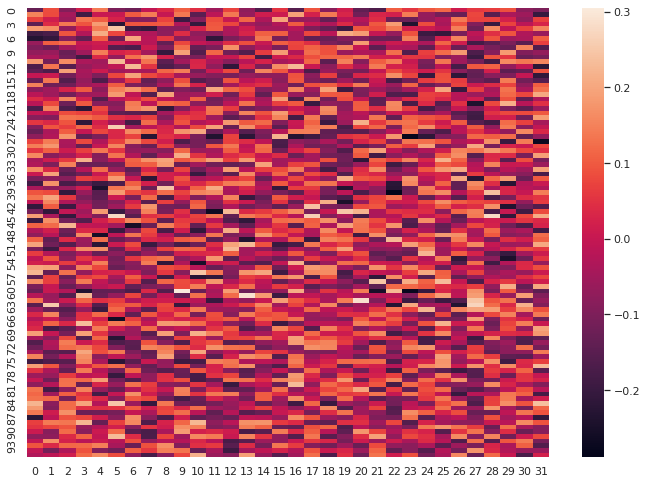

In [84]:
sns.heatmap(gru_model.gru.weight_hh_l0.detach().numpy())

<AxesSubplot:>

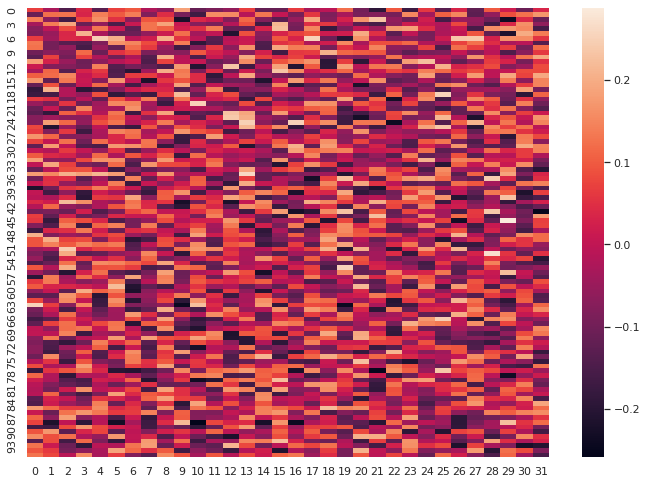

In [85]:
sns.heatmap(gru_model.gru.weight_hh_l0_reverse.detach().numpy())

<BarContainer object of 96 artists>

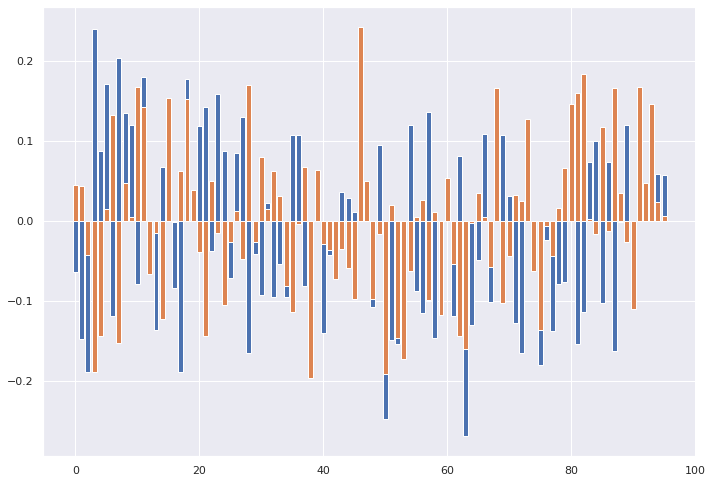

In [98]:
plt.bar(np.arange(96), gru_model.gru.bias_hh_l0.detach().numpy())
#plt.bar(np.arange(96), gru_model.gru.bias_hh_l0_reverse.detach().numpy())
plt.bar(np.arange(96), np.flip(gru_model.gru.bias_hh_l0_reverse.detach().numpy()))

In [120]:
W_ir_0, W_iz_0, W_in_0 = gru_model.gru.weight_ih_l0.chunk(3, 0)
W_hr_0, W_hz_0, W_hn_0 = gru_model.gru.weight_hh_l0.chunk(3, 0)

W_ir_0_r, W_iz_0_r, W_in_0_r = gru_model.gru.weight_ih_l0_reverse.chunk(3, 0)
W_hr_0_r, W_hz_0_r, W_hn_0_r = gru_model.gru.weight_hh_l0_reverse.chunk(3, 0)

In [113]:
W_ir_0.squeeze(1).detach().numpy().shape

(32,)

<BarContainer object of 32 artists>

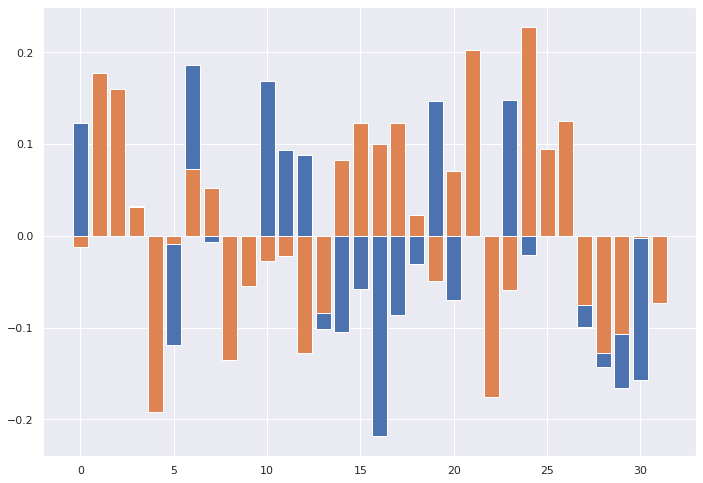

In [116]:
plt.bar(np.arange(32), W_ir_0.squeeze(1).detach().numpy())
plt.bar(np.arange(32), W_ir_0_h.squeeze(1).detach().numpy())

<AxesSubplot:>

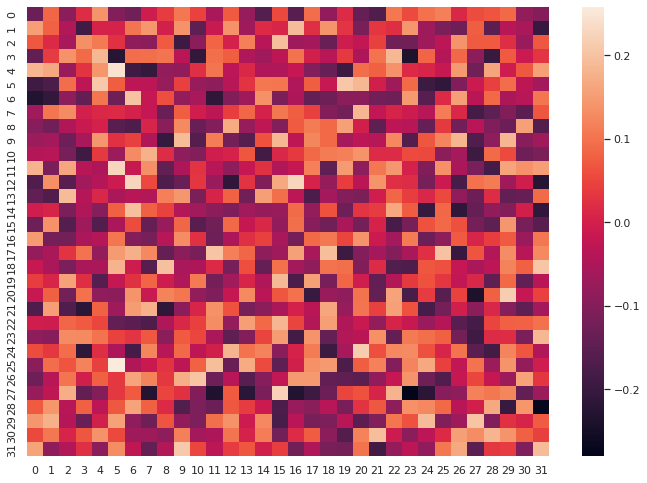

In [122]:
sns.heatmap(W_hr_0.detach().numpy())

<AxesSubplot:>

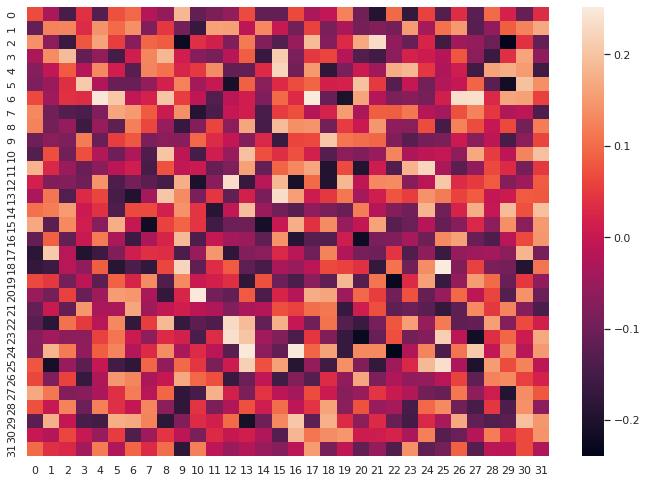

In [123]:
sns.heatmap(W_hr_0_r.detach().numpy())

In [158]:
np.sum(y_pred[row_indices, col_indices], axis=0).shape

(32,)

/tmp/ipykernel_324798/4139415673.py:17: RuntimeWarning: invalid value encountered in true_divide
  dist = dist / np.sum(dist)
/tmp/ipykernel_324798/4139415673.py:17: RuntimeWarning: invalid value encountered in true_divide
  dist = dist / np.sum(dist)
/tmp/ipykernel_324798/4139415673.py:17: RuntimeWarning: invalid value encountered in true_divide
  dist = dist / np.sum(dist)
/tmp/ipykernel_324798/4139415673.py:17: RuntimeWarning: invalid value encountered in true_divide
  dist = dist / np.sum(dist)


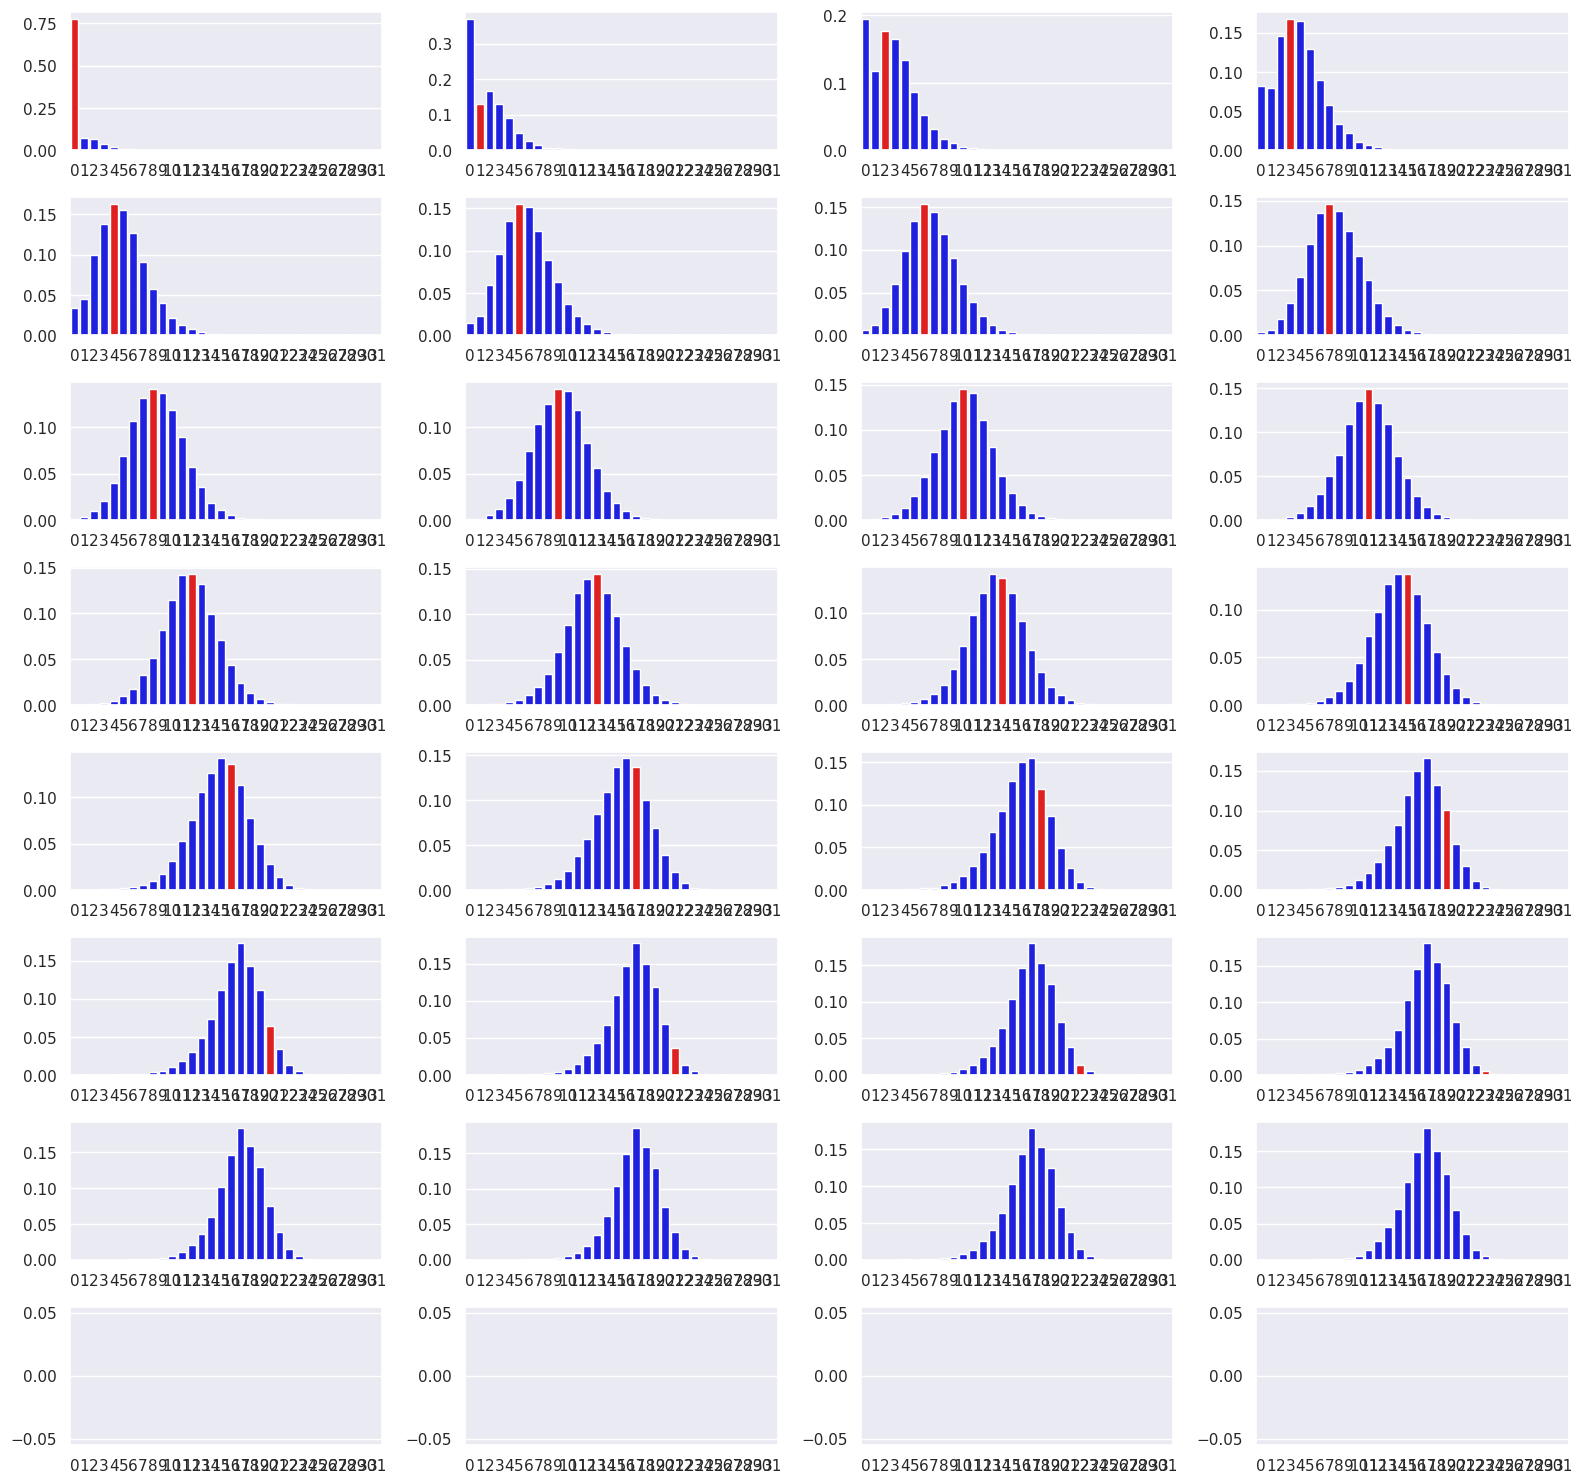

In [161]:
num_classes = 32

fig, axs = plt.subplots(nrows=8, ncols=4, figsize=(16, 15), tight_layout=True)
axs = np.ravel(axs)

for i in range(num_classes):
    dist = [0.0] * 32

    for j in range(99):
        y_true = torch.load(f"output_const_big_test/y_true_{j}.pt").numpy()
        y_pred = myexp(torch.load(f"output_const_big_test/y_pred_{j}.pt")).numpy()
        row_indices, col_indices = np.where(y_true == i)
        if len(row_indices) == 0:
            continue
        
        dist += np.sum(y_pred[row_indices, col_indices], axis=0)
    dist = dist / np.sum(dist)
    
    clrs = np.where(np.arange(num_classes) == i, 'red', 'blue')
    sns.barplot(ax=axs[i], x=np.arange(num_classes), y=dist, palette=clrs)

# Toplist

In [ ]:
num_classes = 32

fig, axs = plt.subplots(nrows=8, ncols=4, figsize=(16, 15), tight_layout=True)
axs = np.ravel(axs)

for i in range(num_classes):
    all_class_counts = np.zeros(num_classes)
    row_indices, col_indices = np.where(y_pred_arg_max == i)
    if len(row_indices) == 0:
        continue
    clrs = np.where(np.arange(num_classes) == i, 'red', 'blue')
    classes, counts = np.unique(y_true[row_indices, col_indices], return_counts=True)
    all_class_counts[classes] = counts
    sns.barplot(ax=axs[i], x=np.arange(num_classes), y=all_class_counts, palette=clrs)